
# Mesmer: Tissue Segmentation

Mesmer can be accessed using `deepcell.applications` with a DeepCell API key.

For more information about using a DeepCell API key, please see :doc:`/API-key`.


In [1]:
!apt-get update
!apt-get install -y python3-dev python3.10-dev build-essential

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1581 B]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [2562 kB]
Get:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 Packages [34.8 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [4724 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1308 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [33.1 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [4396 kB]
Hit:10 http://archive.ubuntu.com/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 

In [4]:
# First uninstall any existing protobuf installations
!pip uninstall -y protobuf

# Install protobuf 3.19.6 which is a stable version known to work
!pip install "protobuf==3.19.6"

# Set environment variable for protobuf implementation BEFORE any imports
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION_VERSION'] = '2'

# Wait a moment to ensure environment variables are set
import time
time.sleep(2)

# Install system dependencies first (needed for deepcell-toolbox compilation)
!apt-get update && apt-get install -y python3-dev

# Install matplotlib first since it's a dependency
!pip install matplotlib

# Install deepcell-toolbox dependencies explicitly
!pip install scikit-image scipy networkx scikit-learn pandas tqdm opencv-python-headless cython numpy

# Install deepcell-toolbox with the correct version that matches deepcell requirements
!pip install deepcell-toolbox==0.12.1

# Now install deepcell and other dependencies in the correct order
!pip install "tensorflow>=2.8.0,<2.9.0"
!pip install "tensorflow-addons>=0.16.1,<0.17.0"
!pip install --no-deps deepcell==0.12.10
!pip install --upgrade pip setuptools wheel

# After installations, restart the kernel
print("Please restart the kernel manually and run your imports again")



Found existing installation: protobuf 4.25.4
Not uninstalling protobuf at /toolkit-cache/0.2.16/python3.10/kernel-libs/lib/python3.10/site-packages, outside environment /root/venv
Can't uninstall 'protobuf'. No files were found to uninstall.
  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.4
    Not uninstalling protobuf at /toolkit-cache/0.2.16/python3.10/kernel-libs/lib/python3.10/site-packages, outside environment /root/venv
    Can't uninstall 'protobuf'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.19.6 which is incompatible.
grpc-google-iam-v1 0.13.1 requires protobuf!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev

In [7]:
!pip install matplotlib==3.10.3

In [10]:
!pip install deepcell

  Using cached DeepCell_Tracking-0.6.5-py3-none-any.whl
INFO: pip is looking at multiple versions of spektral to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 135.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 256.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 229.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 207.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 246.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56/56 [jupyter]


In [13]:
# Install spektral and other missing dependencies first
!pip install "spektral~=1.0.4" jupyter pydot deepcell-tracking~=0.6.5

In [1]:



from deepcell.datasets import TissueNetSample
from deepcell.utils.plot_utils import create_rgb_image, make_outline_overlay
from tqdm import tqdm

In [4]:
# First import the required modules 
from deepcell.datasets import TissueNetSample

# Download multiplex data
X, y, _ = TissueNetSample().load_data()

4038656/4023848 [==============================] - 1s 0us/step


create rgb overlay of image data for visualization



In [7]:
from matplotlib import pyplot as plt
from deepcell.utils.plot_utils import create_rgb_image, make_outline_overlay

rgb_images = create_rgb_image(X, channel_colors=['green', 'blue'])

plot the data



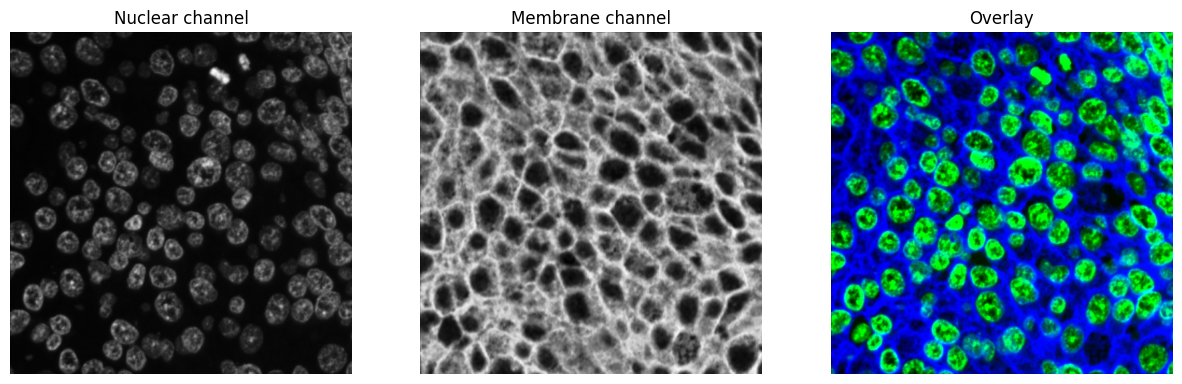

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(X[0, ..., 0], cmap='Greys_r')
ax[1].imshow(X[0, ..., 1], cmap='Greys_r')
ax[2].imshow(rgb_images[0, ...])

ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
ax[2].set_title('Overlay')

for a in ax:
    a.axis('off')

plt.show()
fig.savefig('mesmer-input.png')

<img src="file://../../images/mesmer-input.png" align="center">

The application will download pretrained weights for tissue segmentation. For more information
about application objects, please see our
[documentation](https://deepcell.readthedocs.io/en/master/API/deepcell.applications.html).



In [16]:
from deepcell.applications import Mesmer

In [19]:
import os
os.environ["DEEPCELL_ACCESS_TOKEN"] = "SjxZfuDC.o33kXi9AhaDJ8LfQjzMMtfaywdfFH2uU"

# Initialize Mesmer after setting a valid token
app = Mesmer()

92.4MB [00:02, 41.1MB/s]
2025-05-14 06:46:56.483266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-05-14 06:46:56.712463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-05-14 06:46:56.712836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-05-14 06:46:56.713899: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow wi

In [22]:
from deepcell.datasets import TissueNet

# Initialize dataset
tissuenet = TissueNet(version='1.1')

# Load test split
X_test, y_test, meta_test = tissuenet.load_data(split='test')


4.08GB [01:25, 51.3MB/s]


## Whole Cell Segmentation

Typically, neural networks perform best on test data that is similar to the training data.
In the realm of biological imaging, the most common difference between datasets is the resolution
of the data measured in microns per pixel. The training resolution of the model can be identified
using ``app.model_mpp``.



In [28]:
print('Training Resolution:', app.model_mpp, 'microns per pixel')

Training Resolution: 0.5 microns per pixel


The resolution of the input data can be specified in ``app.predict`` using the ``image_mpp``
option.
The ``Application`` will rescale the input data to match the training resolution and then rescale
to the original size before returning the labeled image.



In [ ]:
segmentation_predictions = app.predict(X, image_mpp=0.5)

create overlay of predictions



In [ ]:
overlay_data = make_outline_overlay(rgb_data=rgb_images, predictions=segmentation_predictions)

select index for displaying



NameError: name 'overlay_data' is not defined

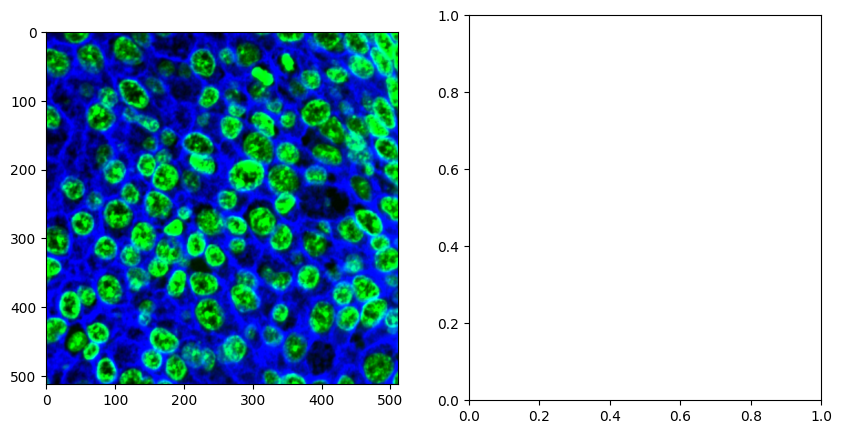

In [25]:
idx = 0

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rgb_images[idx, ...])
ax[1].imshow(overlay_data[idx, ...])

ax[0].set_title('Raw data')
ax[1].set_title('Predictions')

for a in ax:
    a.axis('off')

plt.show()
fig.savefig('mesmer-wc.png')

<img src="file://../../images/mesmer-wc.png" align="center">



## Nuclear Segmentation



In addition to predicting whole-cell segmentation, Mesmer can also be used for nuclear
predictions



In [31]:
segmentation_predictions_nuc = app.predict(X, image_mpp=0.5, compartment='nuclear')

2025-05-13 16:42:10.579700: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8204


In [22]:
overlay_data_nuc = make_outline_overlay(
    rgb_data=rgb_images,
    predictions=segmentation_predictions_nuc)

In [25]:
import numpy as np
from tqdm import tqdm

# Initialize lists to store predictions and valid indices
predictions = []
valid_indices = []

# Use a smaller batch size to reduce memory usage
batch_size = 2  # Keep small batch size to manage memory
total_batches = len(X_test) // batch_size + (1 if len(X_test) % batch_size != 0 else 0)

try:
    # Process in batches - now using full dataset
    for i in tqdm(range(0, len(X_test), batch_size), desc="Processing batches"):
        # Get current batch
        batch = X_test[i:i+batch_size]
        batch_indices = list(range(i, min(i+batch_size, len(X_test))))
        
        # Get ground truth for this batch
        batch_y = y_test[i:i+batch_size, ..., 0:1]  # Select first channel
        
        # Predict on batch
        batch_predictions = app.predict(batch, 
                                      image_mpp=0.5, 
                                      compartment='nuclear')
        
        # Filter valid predictions in this batch
        for j, (pred, gt) in enumerate(zip(batch_predictions, batch_y)):
            if np.any(gt > 0):  # Only include if ground truth has objects
                predictions.append(pred)
                valid_indices.append(batch_indices[j])
                
        # Optional: Clear some memory
        del batch_predictions
        del batch
        
    # Combine all valid predictions
    if predictions:
        test_segmentation_predictions = np.stack(predictions, axis=0)
        filtered_y_test = y_test[valid_indices, ..., 0:1]
        
        print(f"Original number of images: {len(X_test)}")
        print(f"Number of images with valid predictions: {len(predictions)}")
        print(f"Shape of filtered predictions: {test_segmentation_predictions.shape}")
        print(f"Shape of filtered ground truth: {filtered_y_test.shape}")
    else:
        print("No valid predictions were generated")
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

Processing batches:  22%|██▏       | 143/662 [00:41<01:37,  5.34it/s]/root/venv/lib/python3.10/site-packages/deepcell_toolbox/deep_watershed.py:193: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  label_image = remove_small_objects(label_image,
Processing batches: 100%|██████████| 662/662 [02:24<00:00,  4.59it/s]
Original number of images: 1324
Number of images with valid predictions: 1311
Shape of filtered predictions: (1311, 256, 256, 1)
Shape of filtered ground truth: (1311, 256, 256, 1)


In [34]:
import numpy as np
import scipy.ndimage as ndi

def get_object_count(mask):
    return len(np.unique(mask)) - 1  # exclude background label 0

def get_total_area(mask):
    return np.sum(mask > 0)


# For Mesmer
modelB_masks = [pred[..., 0] for pred in test_segmentation_predictions]
mesmer_counts = [get_object_count(m) for m in modelB_masks]
mesmer_areas = [get_total_area(m) for m in modelB_masks]


In [46]:
import pandas as pd
# Create the DataFrame
df_mesmer = pd.DataFrame({
    'image_index': list(range(len(test_segmentation_predictions))),
    'object_count': mesmer_counts,
    'total_area': mesmer_areas
})

# Display the DataFrame
print(df_mesmer.head())
df_mesmer.to_csv('/work/mesmer_results.csv', index=False)


   image_index  object_count  total_area
0            0           295       58947
1            1           247       50430
2            2           245       54042
3            3           207       41047
4            4           195       36769


In [47]:
# Install stardist
!pip install stardist

  Using cached numpy-2.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 136.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 161.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 163.0 MB/s eta 0:00:00
Using cached numpy-2.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [stardist]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deepcell 0.12.10 requires jupyter<2,>=1.0.0, which is not installed.
deepcell 0.12.10 requires pydot<2,>=1.4.2, which is not installed.
deepcell 0.12.10 requires spektral~=1.0.4, whi

In [56]:
from stardist.matching import matching, matching_dataset

In [86]:
# Compute matching statistics for each threshold
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
stats_per_tau = {}
    
for t in tqdm(taus, desc="Computing matching stats"):
    stats = matching_dataset(filtered_y_test, 
                               test_segmentation_predictions, 
                               thresh=t, 
                               show_progress=False)
    stats_per_tau[t] = stats

# --- Print all stats ---
for t, stats in stats_per_tau.items():
    print(f"Tau = {t:.1f} --> {stats}")    
   

Computing matching stats: 100%|██████████| 9/9 [00:48<00:00,  5.41s/it]Tau = 0.1 --> DatasetMatching(criterion='iou', thresh=0.1, fp=5912, tp=125482, fn=19743, precision=0.9550055558092455, recall=0.8640523325873645, accuracy=0.8302533463016998, f1=0.907255105397677, n_true=145225, n_pred=131394, mean_true_score=0.5785409126143833, mean_matched_score=0.6695669819928263, panoptic_quality=0.607468062818706, by_image=False)
Tau = 0.2 --> DatasetMatching(criterion='iou', thresh=0.2, fp=7280, tp=124114, fn=21111, precision=0.9445941214971765, recall=0.8546324668617662, accuracy=0.8138356119471493, f1=0.8973642446831201, n_true=145225, n_pred=131394, mean_true_score=0.5771105212131206, mean_matched_score=0.6752733409863145, panoptic_quality=0.605966151588831, by_image=False)
Tau = 0.3 --> DatasetMatching(criterion='iou', thresh=0.3, fp=10095, tp=121299, fn=23926, precision=0.9231700077629116, recall=0.83524875193665, accuracy=0.7809618851403554, f1=0.8770113405080634, n_true=145225, n_pred=1

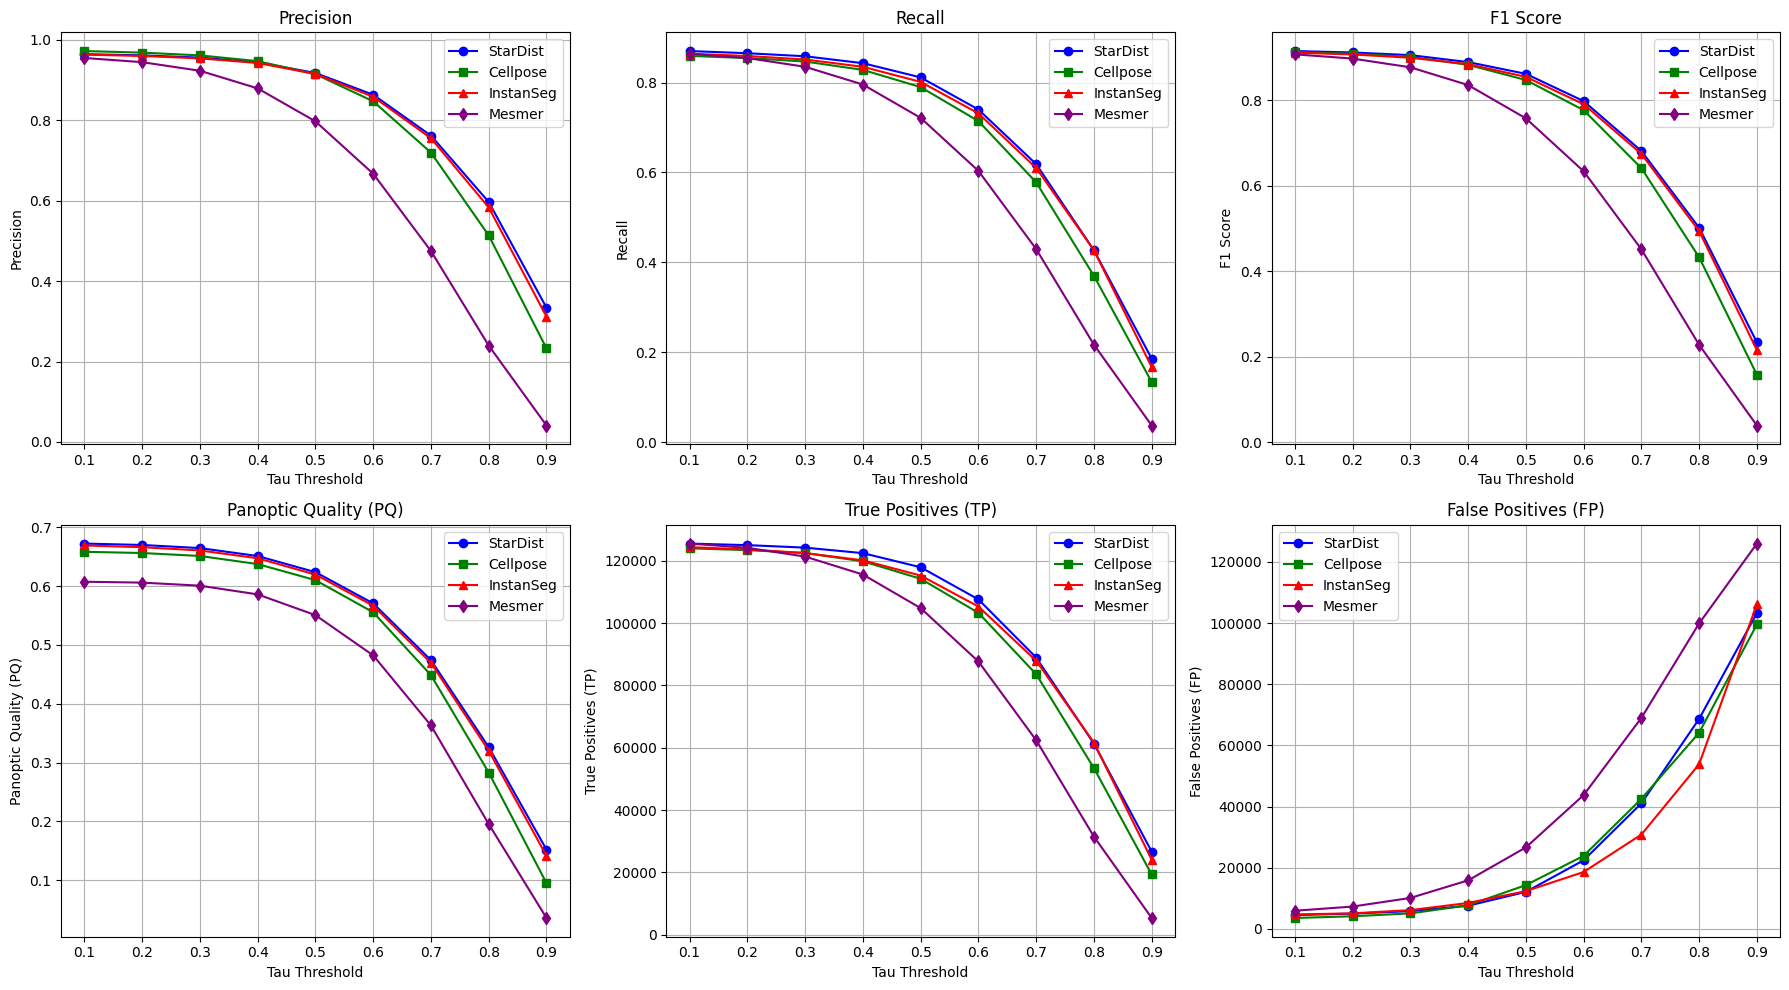

In [89]:
import matplotlib.pyplot as plt

# Tau thresholds
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Define metrics for each model
stardist_metrics = [
    [0.9645, 0.9615, 0.9559, 0.9442, 0.9176, 0.8635, 0.7619, 0.5969, 0.3341],  # precision
    [0.8702, 0.8654, 0.8586, 0.8432, 0.8116, 0.7401, 0.6186, 0.4269, 0.1858],  # recall
    [0.9150, 0.9117, 0.9055, 0.8892, 0.8617, 0.7979, 0.6812, 0.5016, 0.2336],  # f1
    [0.6724, 0.6700, 0.6647, 0.6512, 0.6238, 0.5707, 0.4742, 0.3263, 0.1522],  # pq
    [125475, 124976, 124173, 122406, 117880, 107570, 88921, 61310, 26695],    # tp
    [4484, 4983, 5786, 7553, 12079, 22400, 41049, 68660, 103275],             # fp
]

cellpose_metrics = [
    [0.9722, 0.9683, 0.9614, 0.9471, 0.9147, 0.8473, 0.7196, 0.5137, 0.2329],
    [0.8594, 0.8546, 0.8469, 0.8283, 0.7900, 0.7144, 0.5781, 0.3701, 0.1339],
    [0.9124, 0.9086, 0.9014, 0.8828, 0.8473, 0.7768, 0.6412, 0.4325, 0.1577],
    [0.6584, 0.6563, 0.6513, 0.6375, 0.6102, 0.5556, 0.4487, 0.2832, 0.0952],
    [123946, 123378, 122442, 119794, 114186, 103262, 83573, 53461, 19348],
    [3539, 4107, 5043, 7691, 14299, 23861, 42496, 64151, 99535],
]

instanseg_metrics = [
    [0.9633, 0.9600, 0.9540, 0.9425, 0.9152, 0.8586, 0.7555, 0.5833, 0.3117],
    [0.8643, 0.8592, 0.8514, 0.8352, 0.8016, 0.7316, 0.6101, 0.4270, 0.1670],
    [0.9113, 0.9070, 0.8994, 0.8844, 0.8546, 0.7907, 0.6744, 0.4938, 0.2154],
    [0.6692, 0.6662, 0.6607, 0.6474, 0.6197, 0.5667, 0.4695, 0.3203, 0.1415],
    [124340, 123599, 122435, 120096, 115218, 105278, 87903, 61609, 24105],
    [4712, 5053, 6113, 8452, 12325, 18585, 30820, 53849, 106193],
]

mesmer_metrics = [
    [0.9550, 0.9446, 0.9232, 0.8794, 0.7974, 0.6671, 0.4749, 0.2398, 0.0410],
    [0.8641, 0.8546, 0.8352, 0.7957, 0.7215, 0.6036, 0.4297, 0.2169, 0.0371],
    [0.9073, 0.8974, 0.8770, 0.8355, 0.7576, 0.6338, 0.4512, 0.2278, 0.0390],
    [0.6075, 0.6060, 0.6008, 0.5860, 0.5507, 0.4823, 0.3632, 0.1956, 0.0359],
    [125482, 124114, 121299, 115554, 104779, 87658, 62405, 31506, 5390],
    [5912, 7280, 10095, 15840, 26615, 43736, 68989, 99888, 126004],
]

# Metric names
metric_names = [
    'Precision',
    'Recall',
    'F1 Score',
    'Panoptic Quality (PQ)',
    'True Positives (TP)',
    'False Positives (FP)',
]

# Set up subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

# Plot each metric
for idx in range(len(metric_names)):
    axs[idx].plot(taus, stardist_metrics[idx], marker='o', label='StarDist', color='blue')
    axs[idx].plot(taus, cellpose_metrics[idx], marker='s', label='Cellpose', color='green')
    axs[idx].plot(taus, instanseg_metrics[idx], marker='^', label='InstanSeg', color='red')
    axs[idx].plot(taus, mesmer_metrics[idx], marker='d', label='Mesmer', color='purple')

    axs[idx].set_title(metric_names[idx])
    axs[idx].set_xlabel('Tau Threshold')
    axs[idx].set_ylabel(metric_names[idx])
    axs[idx].grid(True)
    axs[idx].legend()

# Adjust layout
plt.tight_layout()
plt.show()


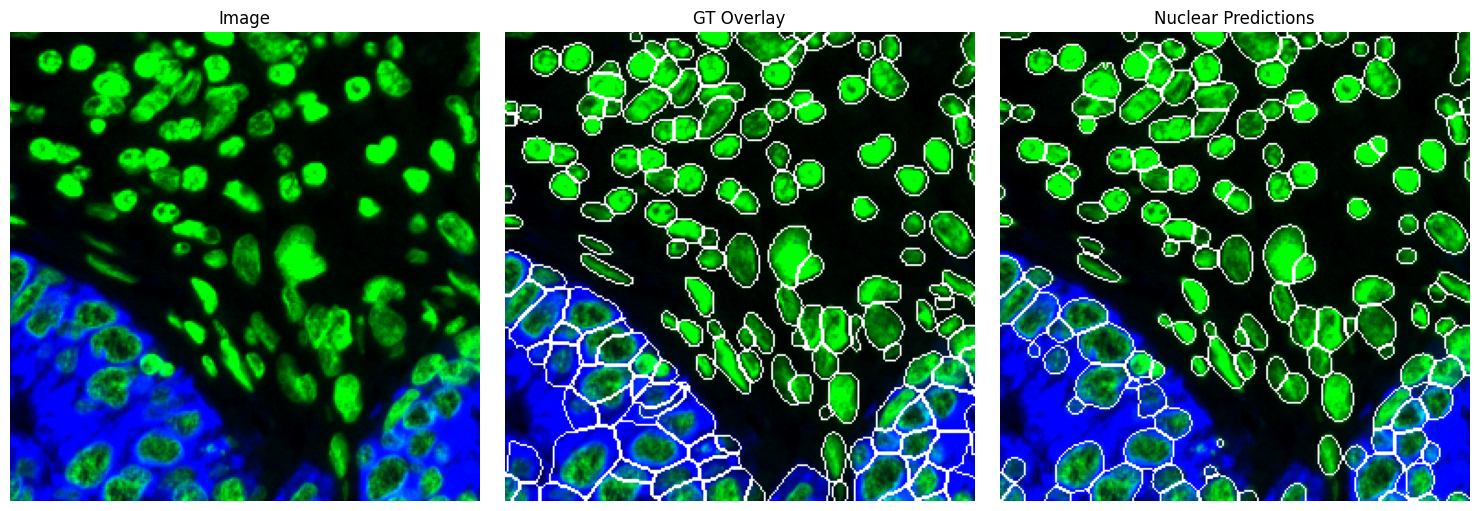

RGB image shape: (256, 256, 3)
Ground truth overlay shape: (256, 256, 3)
Prediction overlay shape: (256, 256, 3)


In [43]:
from matplotlib import pyplot as plt
from deepcell.utils.plot_utils import create_rgb_image, make_outline_overlay

# Create RGB image for visualization
rgb_test_images = create_rgb_image(X_test[valid_indices], channel_colors=['green', 'blue'])

# Create overlay of predictions
overlay_test_data = make_outline_overlay(
    rgb_data=rgb_test_images,
    predictions=test_segmentation_predictions
)

# Create overlay of ground truth
ground_truth_overlay = make_outline_overlay(
    rgb_data=rgb_test_images,
    predictions=filtered_y_test
)

# Plot sample image (index 19)
idx = 20

# Create the plot with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot original image, ground truth overlay, and prediction overlay
ax[0].imshow(rgb_test_images[idx, ...])
ax[1].imshow(ground_truth_overlay[idx, ...])  # RGB overlay for ground truth
ax[2].imshow(overlay_test_data[idx, ...])

# Set titles
ax[0].set_title('Image')
ax[1].set_title('GT Overlay')
ax[2].set_title('Nuclear Predictions')

# Remove axes
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
fig.savefig('mesmer-test-sample-with-ground-truth.png')

# Print shape information to verify
print(f"RGB image shape: {rgb_test_images[idx].shape}")
print(f"Ground truth overlay shape: {ground_truth_overlay[idx].shape}")
print(f"Prediction overlay shape: {overlay_test_data[idx].shape}")

select index for displaying



In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def bland_altman_comparison(pred1, pred2, model1_name="Model 1", model2_name="Model 2"):
    """
    Create Bland-Altman plot and statistics comparing two segmentation models
    
    Args:
        pred1: Predictions from first model (e.g., Mesmer)
        pred2: Predictions from second model (e.g., Stardist)
        model1_name: Name of first model
        model2_name: Name of second model
    """
    # Count objects per image for each model
    pred1_objects = np.array([len(np.unique(mask)) - 1 for mask in pred1])  # -1 for background
    pred2_objects = np.array([len(np.unique(mask)) - 1 for mask in pred2])
    
    # Calculate differences and means
    diff = pred2_objects - pred1_objects
    mean = (pred2_objects + pred1_objects) / 2
    
    # Calculate statistics
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    
    # Calculate 95% limits of agreement
    loa_lower = mean_diff - 1.96 * std_diff
    loa_upper = mean_diff + 1.96 * std_diff
    
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bland-Altman Plot
    ax1.scatter(mean, diff, alpha=0.5, c='blue')
    ax1.axhline(y=mean_diff, color='k', linestyle='-', label='Mean difference')
    ax1.axhline(y=loa_lower, color='r', linestyle='--', label='95% Limits of agreement')
    ax1.axhline(y=loa_upper, color='r', linestyle='--')
    
    ax1.set_xlabel('Mean objects per image')
    ax1.set_ylabel(f'Difference ({model2_name} - {model1_name})')
    ax1.set_title(f'Bland-Altman Plot: {model2_name} vs {model1_name}')
    ax1.legend()
    
    # Correlation Plot
    ax2.scatter(pred1_objects, pred2_objects, alpha=0.5, c='blue')
    
    # Add identity line
    min_val = min(pred1_objects.min(), pred2_objects.min())
    max_val = max(pred1_objects.max(), pred2_objects.max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'k--', label='Identity line')
    
    ax2.set_xlabel(f'{model1_name} objects per image')
    ax2.set_ylabel(f'{model2_name} objects per image')
    ax2.set_title('Correlation Plot')
    ax2.legend()
    
    plt.tight_layout()
    
    # Calculate correlation coefficient
    correlation = stats.pearsonr(pred1_objects, pred2_objects)
    
    # Print statistics
    print(f"\nComparison Statistics: {model2_name} vs {model1_name}")
    print("-" * 50)
    print(f"Mean difference: {mean_diff:.2f} objects")
    print(f"Standard deviation of differences: {std_diff:.2f}")
    print(f"95% Limits of agreement: ({loa_lower:.2f}, {loa_upper:.2f})")
    print(f"Correlation coefficient: {correlation[0]:.3f}")
    print(f"P-value: {correlation[1]:.4f}")
    
    # Calculate additional metrics
    abs_diff = np.abs(diff)
    mean_abs_diff = np.mean(abs_diff)
    median_abs_diff = np.median(abs_diff)
    
    print(f"\nMean absolute difference: {mean_abs_diff:.2f} objects")
    print(f"Median absolute difference: {median_abs_diff:.2f} objects")
    
    return {
        'mean_diff': mean_diff,
        'std_diff': std_diff,
        'loa_lower': loa_lower,
        'loa_upper': loa_upper,
        'correlation': correlation[0],
        'mean_abs_diff': mean_abs_diff,
        'median_abs_diff': median_abs_diff
    }

# Example usage:
# Assuming you have predictions from different models:

# Compare Mesmer vs Stardist
#stats = bland_altman_comparison(
#    mesmer_predictions,  # your Mesmer predictions
#    stardist_predictions,  # your Stardist predictions
#    model1_name="Mesmer",
#    model2_name="Stardist"
#)

# You can also create a table of comparisons
def create_comparison_table(predictions_dict):
    """
    Create a comparison table between multiple models
    
    Args:
        predictions_dict: Dictionary of model predictions
        {model_name: predictions}
    """
    models = list(predictions_dict.keys())
    n_models = len(models)
    
    # Create empty table to store results
    comparison_table = {}
    
    # Compare each pair of models
    for i in range(n_models):
        for j in range(i+1, n_models):
            model1 = models[i]
            model2 = models[j]
            
            stats = bland_altman_comparison(
                predictions_dict[model1],
                predictions_dict[model2],
                model1_name=model1,
                model2_name=model2
            )
            
            comparison_table[f"{model1}_vs_{model2}"] = stats
    
    return comparison_table

# Example usage:
#predictions_dict = {
#    "Mesmer": mesmer_predictions,
#    "Stardist": stardist_predictions,
#    "Cellpose": cellpose_predictions
#}
#comparison_table = create_comparison_table(predictions_dict)

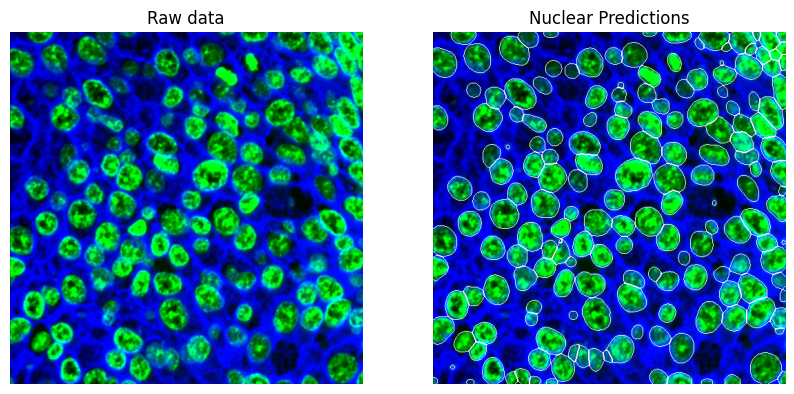

In [22]:
idx = 0

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rgb_images[idx, ...])
ax[1].imshow(overlay_data_nuc[idx, ...])

ax[0].set_title('Raw data')
ax[1].set_title('Nuclear Predictions')

for a in ax:
    a.axis('off')

plt.show()
fig.savefig('mesmer-nuc.png')

<img src="file://../../images/mesmer-nuc.png" align="center">



## Fine-tuning the model output

In most cases, we find that the default settings for the model work quite well across a range of
tissues. However, if you notice specific, consistent errors in your data, there are a few things
you can change.

The first is the ``interior_threshold`` parameter. This controls how conservative the model is in
estimating what is a cell vs what is background. Lower values of ``interior_threshold`` will
result in larger cells, whereas higher values will result in smaller cells.

The second is the ``maxima_threshold`` parameter. This controls what the model considers a unique
cell. Lower values will result in more separate cells being predicted, whereas higher values
will result in fewer cells.



To demonstrate the effect of ``interior_threshold``, we'll compare the default  with a much more
stringent setting



In [ ]:
segmentation_predictions_interior = app.predict(
    X,
    image_mpp=0.5,
    postprocess_kwargs_whole_cell={'interior_threshold': 0.5})
overlay_data_interior = make_outline_overlay(
    rgb_data=rgb_images,
    predictions=segmentation_predictions_interior)

select index for displaying



In [ ]:
idx = 0

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(overlay_data[idx, ...])
ax[1].imshow(overlay_data_interior[idx, ...])

ax[0].set_title('Default settings')
ax[1].set_title('More restrictive interior threshold')

for a in ax:
    a.axis('off')

plt.show()
fig.savefig('mesmer-interior-threshold.png')

<img src="file://../../images/mesmer-interior-threshold.png" align="center">



To demonstrate the effect of ``maxima_threshold``, we'll compare the default with a much more
stringent setting



In [ ]:
segmentation_predictions_maxima = app.predict(
    X,
    image_mpp=0.5,
    postprocess_kwargs_whole_cell={'maxima_threshold': 0.8})
overlay_data_maxima = make_outline_overlay(
    rgb_data=rgb_images,
    predictions=segmentation_predictions_maxima)

select index for displaying



In [ ]:
idx = 0

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(overlay_data[idx, ...])
ax[1].imshow(overlay_data_maxima[idx, ...])

ax[0].set_title('Default settings')
ax[1].set_title('More stringent maxima threshold')

for a in ax:
    a.axis('off')

plt.show()
fig.savefig('mesmer-maxima-threshold.png')

<img src="file://../../images/mesmer-maxima-threshold.png" width="400pt" align="center">



Finally, if your data doesn't include in a strong membrane marker, the model will default to just
predicting the nuclear segmentation, even for whole-cell mode. If you'd like to add a manual
pixel expansion after segmentation, you can do that using the ``pixel_expansion`` argument. This
will universally apply an expansion after segmentation to each cell



To demonstrate the effect of ``pixel_expansion``, we'll compare the nuclear output
with expanded output



In [ ]:
segmentation_predictions_expansion = app.predict(
    X,
    image_mpp=0.5,
    compartment='nuclear',
    postprocess_kwargs_nuclear={'pixel_expansion': 5}
)
overlay_data_expansion = make_outline_overlay(
    rgb_data=rgb_images,
    predictions=segmentation_predictions_expansion
)

select index for displaying



In [ ]:
idx = 0

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(overlay_data_nuc[idx, ...])
ax[1].imshow(overlay_data_expansion[idx, ...])

ax[0].set_title('Default nuclear segmentation')
ax[1].set_title('Nuclear segmentation with an expansion')

for a in ax:
    a.axis('off')

plt.show()
fig.savefig('mesmer-nuc-expansion.png')

<img src="file://../../images/mesmer-nuc-expansion.png" align="center">



There's a separate dictionary passed to the model that controls the post-processing for
whole-cell and nuclear predictions. You can modify them independently to fine-tune the output.
The current defaults the model is using can be found
[here](https://github.com/vanvalenlab/deepcell-tf/blob/master/deepcell/applications/mesmer.py#L272)

